<a href="https://colab.research.google.com/github/CBelleLopez/CSE151A_Proj/blob/main/Decision_Tree_Model_Project_WriteUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

Here, we drop Name columns, change Sex into numerical values, and create a family size column

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("hf://datasets/julien-c/titanic-survival/titanic.csv")

In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
data = data.drop(["Name"], axis=1)
data['Sex']=data['Sex'].map({'male':0,'female':1})
data['FamilySize']=data['Siblings/Spouses Aboard']+data['Parents/Children Aboard']+1
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,FamilySize
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,1


# Decision Tree Learning

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [7]:
X = data.drop(['Pclass','Fare'], axis=1)
y = data['Pclass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
decisiontree = tree.DecisionTreeClassifier()

In [9]:
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
#ground truth
y_test = np.array(y_test)

In [11]:
yhat = decisiontree.predict(X_test)

In [12]:
yhat

array([1, 2, 2, 1, 1, 2, 3, 3, 2, 1, 2, 1, 3, 1, 2, 2, 3, 1, 2, 3, 3, 3,
       3, 1, 3, 1, 1, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3,
       3, 1, 2, 3, 3, 3, 3, 1, 3, 3, 2, 3, 1, 3, 2, 3, 3, 2, 3, 2, 1, 3,
       3, 2, 3, 2, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 2, 2, 1, 3,
       2, 3, 2, 1, 3, 2, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 2, 3, 1,
       1, 3, 2, 3, 3, 2, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3,
       3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 2, 1, 2, 2, 1, 1, 1, 3, 2, 2, 2,
       3, 1])

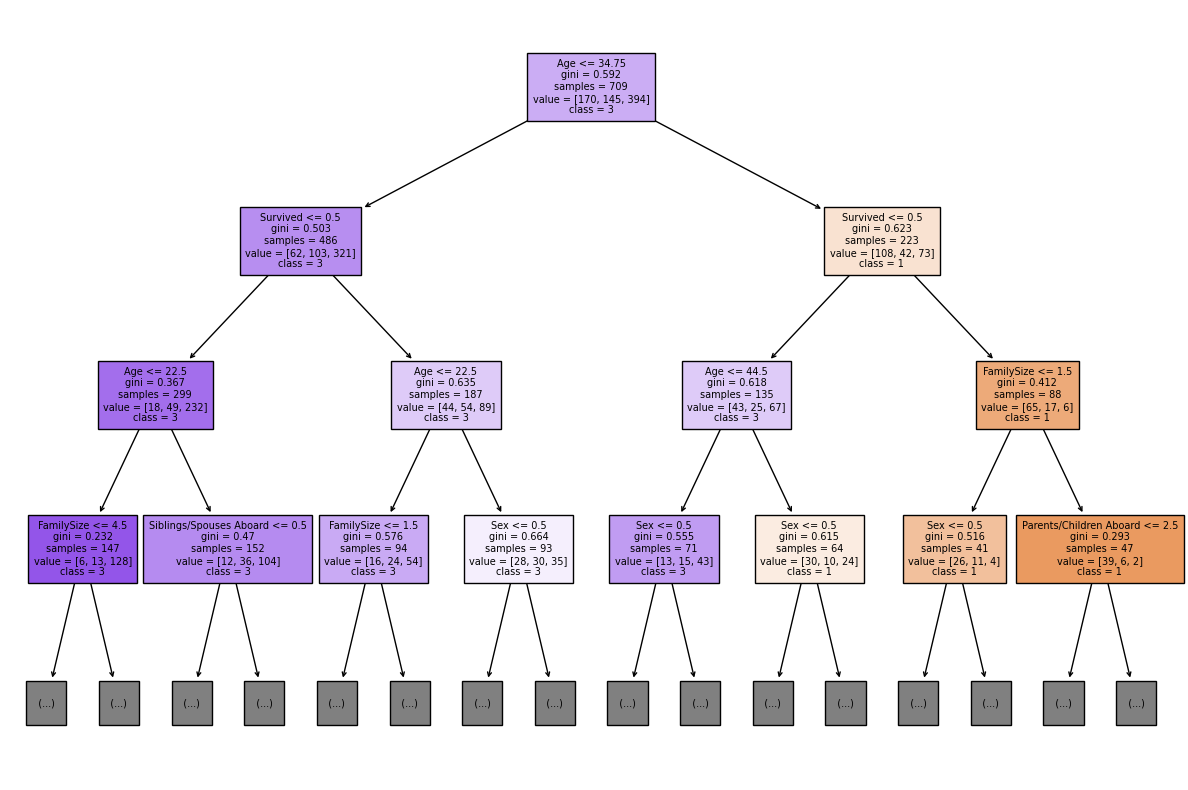

In [13]:
plt.figure(figsize=(15,10))
tree.plot_tree(decisiontree, feature_names=X.columns, class_names=['1','2','3'], filled=True, fontsize=7, max_depth=3);


## Evaluating our model's score

In [14]:
decisiontree.score(X_train,y_train) #Return the mean accuracy on the given test data and labels.

0.8307475317348378

In [15]:
decisiontree.score(X_test,y_test)

0.5842696629213483